# Statistics on CIENSFO

In [1]:
#### Importating packages
import pandas as pd
import matplotlib.pyplot as plt

## Defining dataframes

In [4]:
#### Importing annotations
df = pd.read_csv(         # dataframe of annotations
    "annotations.csv",
    dtype={
        'sent_id':str, 'sent_type':int,
        'noun':str, 'adj':str, 'verb':str,
        'negated':str,
        'adv_clause':str,
        'prep':str,
        'graft_prep':str,
        'non_std_type':str,
        'wh':str, 'wh2':str,
        'marker':str, 'marker2':str,
        'class':str,
        'note':str
        }
).fillna(value = '')

print(df.iloc[0:5])

  sent_id  sent_type        noun adj      verb negated adv_clause prep  \
0       1          2     dispute                                   sur   
1       2          2  conscience                                    de   
2       3          2  différence                                    de   
3       4          2                  dépendre       0              de   
4       5          2                  discuter       0              de   

  graft_prep non_std_type        wh wh2 marker marker2     class note  
0                               qui                        Q=S V       
1                    qecq      qecq                     QsekVinf       
2                           comment                          QSV       
3                          pourquoi                          QSV       
4                           comment                          QSV       


In [5]:
#### Defining subtables

# core_df contains the reliable occurrences:
# type 2 or 4, introduced by a preposition and no 'warning' note
# also removing conjuncted and grafts
core_df = df.loc[(df['sent_type'] != 1) & (df['sent_type'] != 3) &
                  (df['prep'] != "/") & (df['note'] == "") &
                  (df['noun'] != "CONJ") & (df['adj'] != "CONJ") &
                  (df['verb'] != "CONJ") & (df['adv_clause'] != "CONJ") &
                  (df['graft_prep'] == "") ]

def dep_type(df):
    if df['noun'] != "":
        return "noun"
    if df['adj'] != "":
        return "adj"
    if df['verb'] != "":
        return "verb"
    if df['adv_clause'] != "":
        return "adv_clause"
    
# Creating additional column of dependence type
core_df['dep'] = core_df.apply(dep_type, axis=1)

print(core_df.iloc[0:5])

  sent_id  sent_type        noun adj      verb negated adv_clause prep  \
0       1          2     dispute                                   sur   
1       2          2  conscience                                    de   
2       3          2  différence                                    de   
3       4          2                  dépendre       0              de   
4       5          2                  discuter       0              de   

  graft_prep non_std_type        wh wh2 marker marker2     class note   dep  
0                               qui                        Q=S V       noun  
1                    qecq      qecq                     QsekVinf       noun  
2                           comment                          QSV       noun  
3                          pourquoi                          QSV       verb  
4                           comment                          QSV       verb  


/tmp/ipykernel_8496/3777369308.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_df['dep'] = core_df.apply(dep_type, axis=1)


In [6]:
# pp_core contains the reliable occurrences complement of a noun,
# dependent on a noun, adjective or verb
pp_core = core_df.loc[core_df['dep'] != "adv_clause"]
noun_core = core_df.loc[core_df['dep'] == "noun"]
adj_core = core_df.loc[core_df['dep'] == "adj"]
verb_core = core_df.loc[core_df['dep'] == "verb"]

# advcl_core contains the reliable occurrences of adverbial clauses
advcl_core = core_df.loc[core_df['dep'] == "adv_clause"]
print(advcl_core.iloc[0:5])

   sent_id  sent_type noun adj verb negated      adv_clause     prep  \
8        9          2                        en fonction de       de   
25      25          2                         par rapport à        à   
31      31          2                                  dans     dans   
50      50          2                               suivant  suivant   
52      52          2                        en fonction de       de   

   graft_prep non_std_type       wh wh2 marker marker2  class note         dep  
8                                           si          si SV       adv_clause  
25                          comment                       QSV       adv_clause  
31                              qui                     Q=S V       adv_clause  
50                          comment                       QSV       adv_clause  
52                             quel                       QSV       adv_clause  


## Statistics

<AxesSubplot:title={'center':'adv_clause'}>

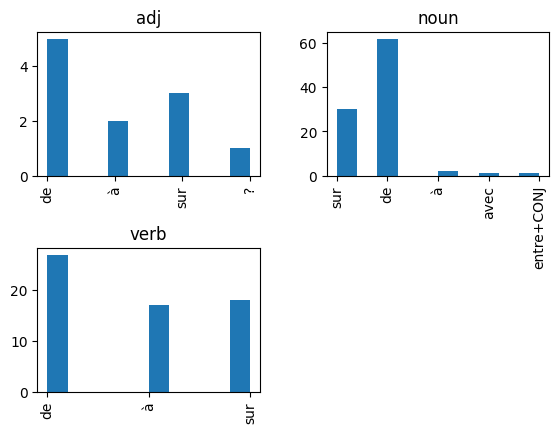

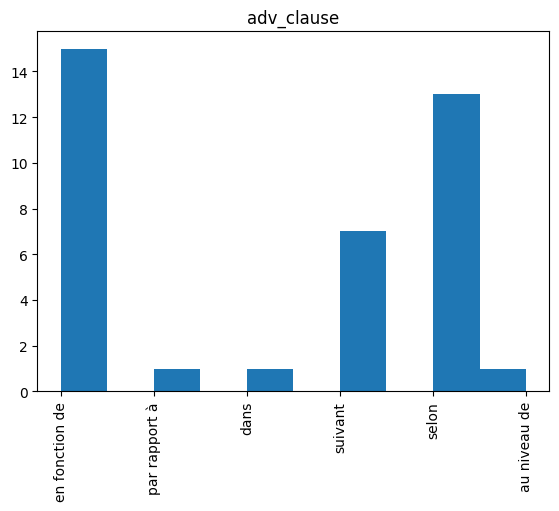

In [10]:
# Histogram of preposition used
pp_core.hist("prep", by="dep")
advcl_core.hist("adv_clause", by="dep")

<AxesSubplot:title={'center':'adv_clause'}>

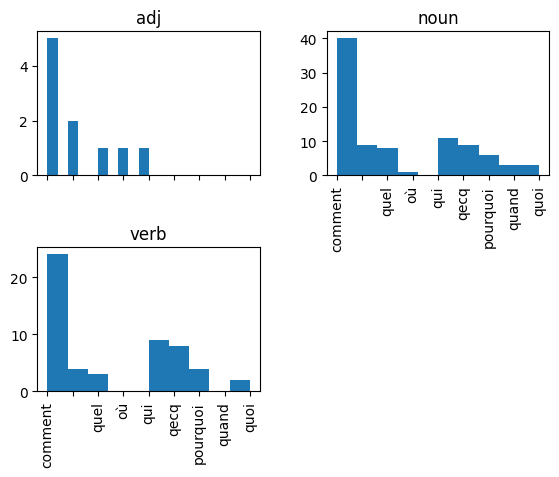

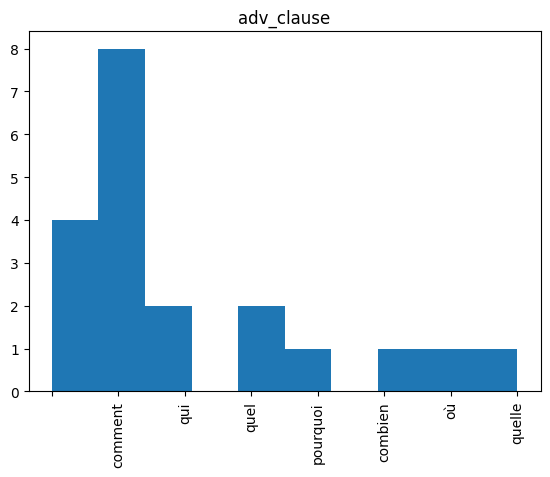

In [40]:
# Statistics on the interrogative word
# (only the first one is taken if the interrogative has multiple qu-words)
plt1 = pp_core.hist("wh", by="dep", sharex=True)
advcl_core.hist("wh", by="dep")

<AxesSubplot:title={'center':'adv_clause'}>

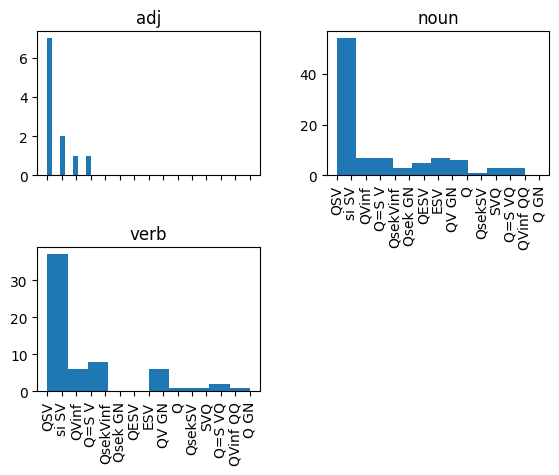

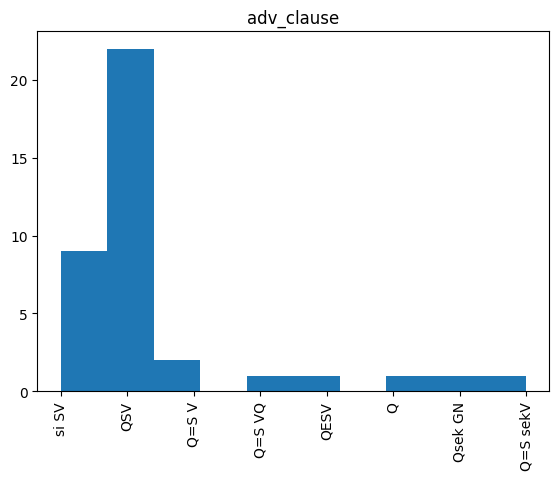

In [21]:
# Statistics on the interrogative class
plt1 = pp_core.hist("class", by="dep", sharex=True)
advcl_core.hist("class", by="dep")

## Tables for the CMLF paper

In [35]:
### Table of prepositions of advcl

# Creating table
prep_table = pd.DataFrame()
prep_table['prep'] = advcl_core['adv_clause'].unique()


# Function to count values of unique prepositions
def value_count(df:pd.DataFrame, sent_type:int) -> None:
    prep = df['prep']
    prep_col = advcl_core[advcl_core['sent_type'] == sent_type]['adv_clause']
    counts = prep_col.value_counts()
    if prep in counts.index:
        return counts[prep]
    return 0


# Applying the function to create two columns
prep_table['CIENSFO'] = prep_table.apply(lambda df: value_count(df, 2), axis=1) 
prep_table['CEFC'] = prep_table.apply(lambda df: value_count(df, 4), axis=1) 

prep_table

prep  CIENSFO  CEFC
0  en fonction de       13     2
1   par rapport à        1     0
2            dans        1     0
3         suivant        2     5
4           selon        7     6
5    au niveau de        0     1

In [46]:
### Table of interrogative word of conditional advcl

# Adding table of wh or marking:
advcl_core['wh_mark'] = advcl_core[['wh','marker']].apply(lambda x: ''.join(x), axis=1)

# Creating table
qu_table = pd.DataFrame()
qu_table['qu_mark'] = advcl_core['wh_mark'].unique()


# Function to count values of unique prepositions
def value_count(df:pd.DataFrame, sent_type:int) -> None:
    prep = df['qu_mark']
    # excluding non conditional advcl
    prep_col = advcl_core[(advcl_core['sent_type'] == sent_type)
                          & (advcl_core['adv_clause'] != "par rapport à")
                          & (advcl_core['adv_clause'] != "dans")
                          & (advcl_core['adv_clause'] != "au niveau de")]['wh_mark']
    counts = prep_col.value_counts()
    if prep in counts.index:
        return counts[prep]
    return 0


# Applying the function to create two columns
qu_table['CIENSFO'] = qu_table.apply(lambda df: value_count(df, 2), axis=1) 
qu_table['CEFC'] = qu_table.apply(lambda df: value_count(df, 4), axis=1) 

qu_table

/tmp/ipykernel_13023/2771199511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advcl_core['wh_mark'] = advcl_core[['wh','marker']].apply(lambda x: ''.join(x), axis=1)


qu_mark  CIENSFO  CEFC
0          si        6     3
1     comment        7     3
2         qui        1     3
3        quel        4     0
4    pourquoi        1     0
5     combien        1     0
6  commentecq        1     0
7          où        1     4
8        qecq        0     0

In [15]:
print(6+7+1+4+1+1+1+1+3+3+3+4)
print(11/35)

35
0.3142857142857143


In [7]:
### Table of interrogative structures of conditional advcl

# Creating table
class_table = pd.DataFrame()
class_table['class'] = advcl_core['class'].unique()


# Function to count values of unique prepositions
def value_count(df:pd.DataFrame, sent_type:int) -> None:
    prep = df['class']
    # excluding non conditional advcl
    prep_col = advcl_core[(advcl_core['sent_type'] == sent_type)
                          & (advcl_core['adv_clause'] != "par rapport à")
                          & (advcl_core['adv_clause'] != "dans")
                          & (advcl_core['adv_clause'] != "au niveau de")]['class']
    counts = prep_col.value_counts()
    if prep in counts.index:
        return counts[prep]
    return 0


# Applying the function to create two columns
class_table['CIENSFO'] = class_table.apply(lambda df: value_count(df, 2), axis=1) 
class_table['CEFC'] = class_table.apply(lambda df: value_count(df, 4), axis=1) 

class_table

class  CIENSFO  CEFC
0     si SV        6     3
1       QSV       13     8
2     Q=S V        1     1
3      QESV        1     0
4         Q        1     0
5   Qsek GN        0     0
6  Q=S sekV        0     1

In [10]:
print(6+13+1+1+1+3+8+1+1)
print(21/35)
print(9/35)

35
0.6
0.2571428571428571
